In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import sys
from matplotlib import pyplot as plt

sys.path.append("../src/features/")
from graph_embed import GraphEmbed
sys.path.append("../src/models/")
from cluster_graphs import ClusterGraphs
sys.path.append("../src/visualization/")
from visualize import Visualize

In [2]:
graph_data = pd.read_pickle("../data/processed/graph_data_pheme.pkl")
raw_networks = pd.read_csv('../data/raw/pheme/pheme_all_events.csv')
clusters = pd.read_pickle("../models/pheme_graphs_clustered.pkl")
graphs = GraphEmbed.read_graphs(clusters)
viz = Visualize(clusters, graphs)

<ipython-input-2-36f3fbb1f846>:2: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_networks = pd.read_csv('../data/raw/pheme/pheme_all_events.csv')


In [3]:
clust1 = clusters.loc[clusters.label == 1]
clust2 = clusters.loc[clusters.label == 2]
clust0 = clusters.loc[clusters.label == 0]

In [4]:
clusters.columns

Index(['graph_embedding', 'id', 'truth', 'title', 'event', 'edges',
       'num_nodes', 'num_edges', 'label', 'is_mean_vec'],
      dtype='object')

In [5]:
graph_data.event.value_counts()

sydneysiege          343
ottawashooting       299
charliehebdo         294
ferguson             165
germanwings-crash     91
prince-toronto        43
putinmissing          22
ebola-essien          11
gurlitt                1
Name: event, dtype: int64

In [6]:
graph_data.truth.value_counts()

true          609
unverified    383
false         277
Name: truth, dtype: int64

In [7]:
cl = ClusterGraphs(clusters)
num_clusters, inertias = cl.choose_clust_num_k_means()

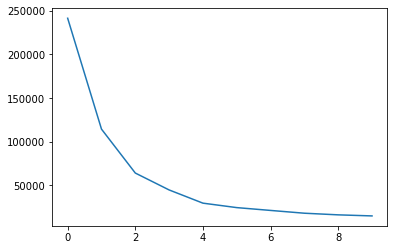

In [8]:
plt.plot(inertias)

In [9]:
num_clusters

3

In [10]:
len(clusters)

1269

## Exploring Differences between Clusters

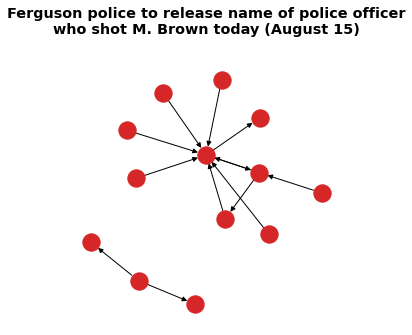

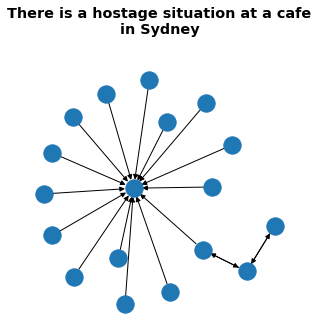

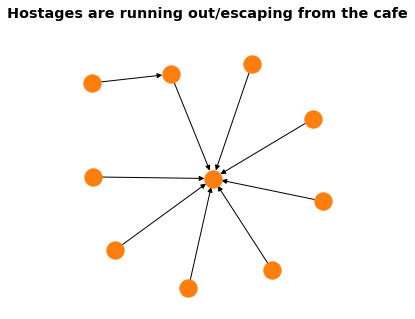

In [11]:
viz.viz_graphs(clusters.loc[clusters.is_mean_vec == True].id.to_list())

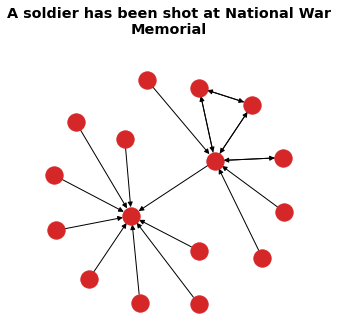

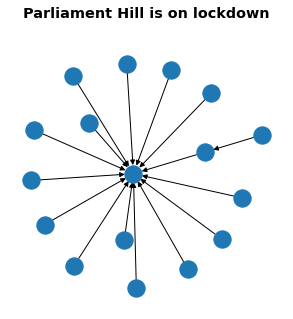

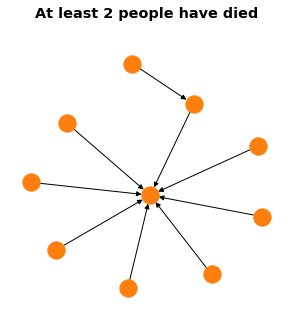

In [12]:
ids = [clust0.sample(1).id.values[0], clust1.sample(1).id.values[0], clust2.sample(1).id.values[0]]
viz.viz_graphs(ids)

In [19]:
viz.plot_cluster_size()

alt.Chart(...)

In [18]:
viz.graph_point_range_cluster_info(True, {"num_nodes": "Number of Nodes"}, 200, 250, 3)

alt.FacetChart(...)

In [15]:
viz.graph_point_range_cluster_info(True, {"num_edges": "Number of Edges"}, 200, 250, 3)

alt.FacetChart(...)

In [16]:
viz.viz_type_clusters("truth")

alt.Chart(...)

In [20]:
viz.viz_type_clusters("event")

alt.Chart(...)

In [17]:
p_components = viz.graph_reduced_dimensions(["id", "num_nodes", "title"], 400, 400, "How Diffusion Networks Vary")
p_components

alt.Chart(...)